## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
if (X.isnull().any().any()):
  print("There are NaNs")
else:
  print("No NaNs")

No NaNs


In [ ]:
# Категориальных признаков нет

In [ ]:
df_cat = (X.dtypes == "object")
df_cat

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_real_norm_np)
X_real_norm_np = normalizer.fit_transform(X_test)
X_test = pd.DataFrame(data=X_real_norm_np)

X_train_norm = pd.DataFrame()
X_train_norm["alcogol"] = X_train[0]
X_train_norm["magnesium"] = X_train[4]

X_test_norm = pd.DataFrame()
X_test_norm["alcogol"] = X_test[0]
X_test_norm["magnesium"] = X_test[4]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_norm, y_train)
y_predicted = clf.predict(X_test_norm)
print("Accuracy for 1 is ", np.mean(y_test==y_predicted), " on tests")
y_predicted = clf.predict(X_train_norm)
print("Accuracy for 1 is ", np.mean(y_train==y_predicted), " on trainings\n")

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_norm, y_train)
y_predicted = clf.predict(X_test_norm)
print("Accuracy for 3 is ", np.mean(y_test==y_predicted), " on tests")
y_predicted = clf.predict(X_train_norm)
print("Accuracy for 3 is ", np.mean(y_train==y_predicted), " on trainings\n")

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_norm, y_train)
y_predicted = clf.predict(X_test_norm)
print("Accuracy for 5 is ", np.mean(y_test==y_predicted), " on tests")
y_predicted = clf.predict(X_train_norm)
print("Accuracy for 5 is ", np.mean(y_train==y_predicted), " on trainings\n")

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train_norm, y_train)
y_predicted = clf.predict(X_test_norm)
print("Accuracy for 10 is ", np.mean(y_test==y_predicted), " on tests")
y_predicted = clf.predict(X_train_norm)
print("Accuracy for 10 is ", np.mean(y_train==y_predicted), " on trainings\n")

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train_norm, y_train)
y_predicted = clf.predict(X_test_norm)
print("Accuracy for 15 is ", np.mean(y_test==y_predicted), " on tests")
y_predicted = clf.predict(X_train_norm)
print("Accuracy for 15 is ", np.mean(y_train==y_predicted), " on trainings\n")

clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train_norm, y_train)
y_predicted = clf.predict(X_test_norm)
print("Accuracy for 25 is ", np.mean(y_test==y_predicted), " on tests")
y_predicted = clf.predict(X_train_norm)
print("Accuracy for 25 is ", np.mean(y_train==y_predicted), " on trainings\n")

Accuracy for 1 is  0.6296296296296297  on tests
Accuracy for 1 is  1.0  on trainings

Accuracy for 3 is  0.7222222222222222  on tests
Accuracy for 3 is  0.7983870967741935  on trainings

Accuracy for 5 is  0.7407407407407407  on tests
Accuracy for 5 is  0.7903225806451613  on trainings

Accuracy for 10 is  0.7962962962962963  on tests
Accuracy for 10 is  0.782258064516129  on trainings

Accuracy for 15 is  0.8333333333333334  on tests
Accuracy for 15 is  0.7338709677419355  on trainings

Accuracy for 25 is  0.7777777777777778  on tests
Accuracy for 25 is  0.6774193548387096  on trainings



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X_train_norm, y_train)
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(X_train_norm, y_train)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf5.fit(X_train_norm, y_train)
clf10 = KNeighborsClassifier(n_neighbors=10)
clf10.fit(X_train_norm, y_train)
clf15 = KNeighborsClassifier(n_neighbors=15)
clf15.fit(X_train_norm, y_train)
clf25 = KNeighborsClassifier(n_neighbors=25)
clf25.fit(X_train_norm, y_train)

X_train_norm

,alcogol,magnesium
0,0.720430,0.336957
1,0.319892,0.239130
2,0.602151,0.543478
3,0.572581,0.347826
4,0.760753,0.173913
...,...,...
119,0.212366,0.173913
120,0.360215,0.086957
121,0.373656,0.413043
122,0.771505,0.336957


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:4

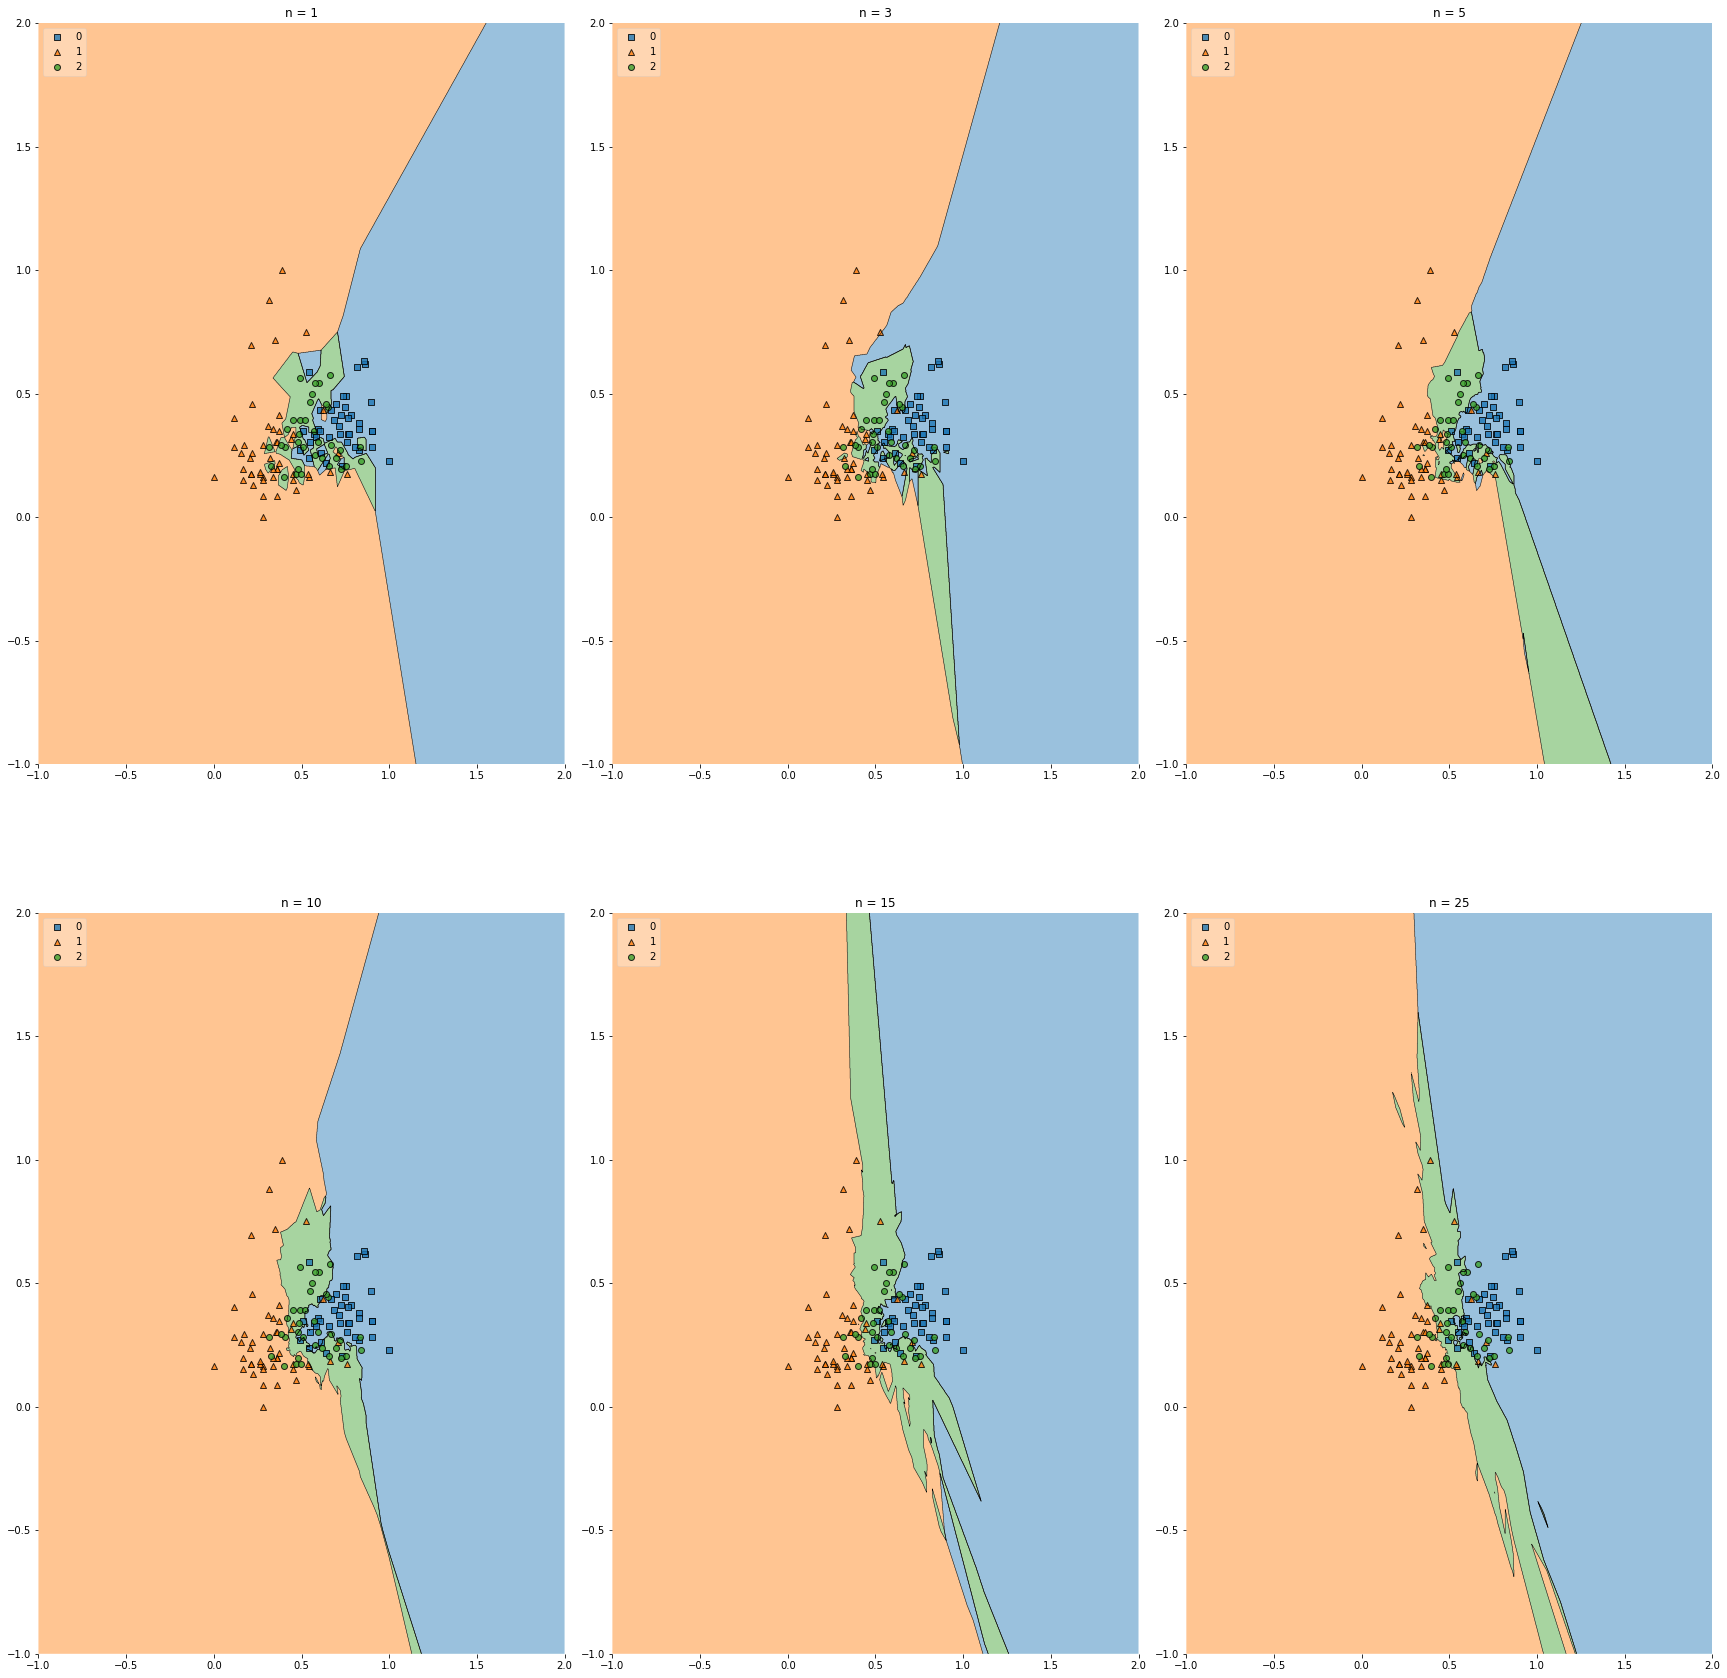

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 6)

fig = plt.figure(figsize=(30,30))

clf.fit(X_train_norm, y_train)
ax = plt.subplot(gs[0, :2])
fig = plot_decision_regions(X=X_train_norm.to_numpy(), y=y_train, clf=clf1, legend=2)
plt.title("n = 1")

ax = plt.subplot(gs[0, 2:4])
fig = plot_decision_regions(X=X_train_norm.to_numpy(), y=y_train, clf=clf3, legend=2)
plt.title("n = 3")

ax = plt.subplot(gs[0, 4:6])
fig = plot_decision_regions(X=X_train_norm.to_numpy(), y=y_train, clf=clf5, legend=2)
plt.title("n = 5")

ax = plt.subplot(gs[1, :2])
fig = plot_decision_regions(X=X_train_norm.to_numpy(), y=y_train, clf=clf10, legend=2)
plt.title("n = 10")

ax = plt.subplot(gs[1, 2:4])  
fig = plot_decision_regions(X=X_train_norm.to_numpy(), y=y_train, clf=clf15, legend=2)
plt.title("n = 15")

ax = plt.subplot(gs[1, 4:6])
fig = plot_decision_regions(X=X_train_norm.to_numpy(), y=y_train, clf=clf25, legend=2)
plt.title("n = 25")

plt.show()

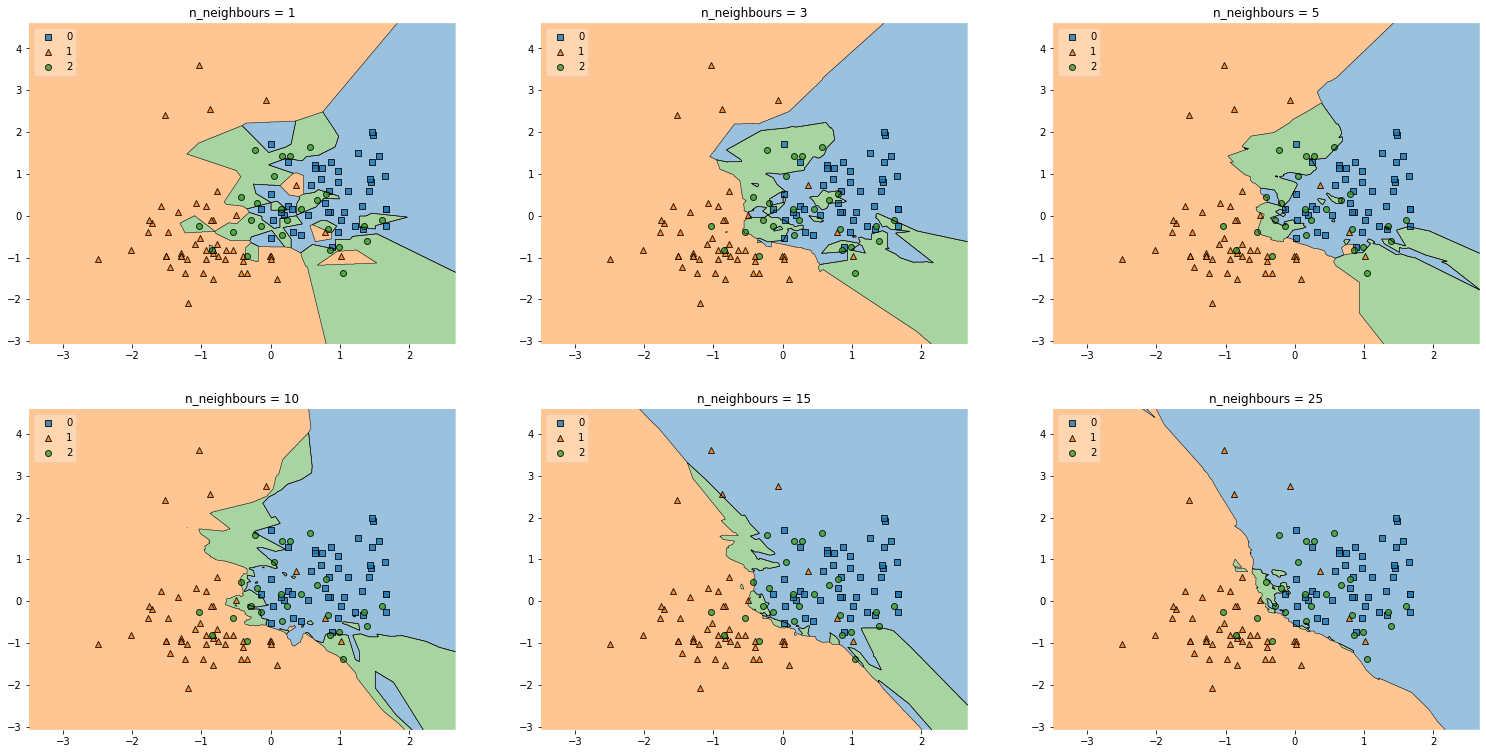

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
# На тестовой выборке точность росла до к = 15, что объяснимо - точек много, и они располагаются близко друг к другу, но и при этом нет супер четких
# областей их появления (то есть необходимо оценивать болькое количество соседей чтобы понять область). В случае к = 25 задействовано слишком большое количесетво соседей (четверть
# наверное), что просто смешивает области и дает результат хуже.

# На трейн-выборке точноть только падала, и по другому буть и не могло. При к = 1 точность = 100%, так как каждая точка - свой ближайший сосед. Это же свойство проявляется и дальше - 
# как минимум один сосед точки правильного цвета (так как этот сосед - сама точка).

# Опттмальное число соседей - 10. При меньшем числе области получаются рваными и неровными - явно модель пытается не обобщить точки одного цвета в одну область, а для каждого их
# их скопления вырисовывает узор. При k > 10 зеленая облась вылетает вверх и вниз, хотя так скорее всего не должно быть, что свидетельствует о том, что модель смотрит на слишком
# много точек. Более того, при. к = 10 точность на трейне и тесте почти совпадает (в задании 1.3).

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

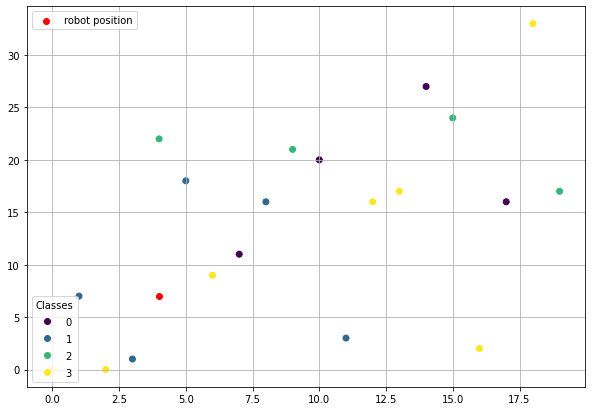

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import random

In [ ]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position.reshape(1, 2)
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]),
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
      key = random.uniform(0, 10)
      if key > 2:
        get_class = self.knn.predict(self.trajectory[len(self.trajectory) - 1].reshape(1, 2))
        self.trajectory = np.append(self.trajectory, [self.trajectory[len(self.trajectory) - 1] + self.mapping[get_class[0]]], axis = 0)
      else:
        self.trajectory = np.append(self.trajectory, [self.trajectory[len(self.trajectory) - 1] + [1, 0]], axis = 0)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [ ]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()

    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

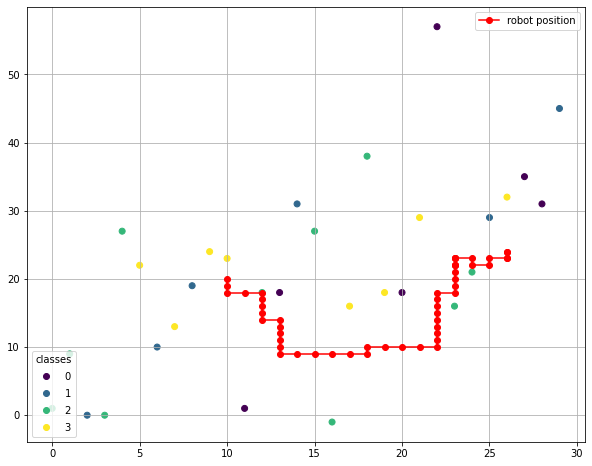

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

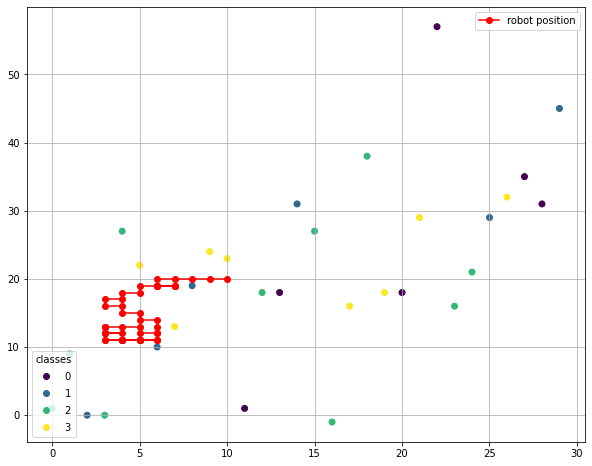

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

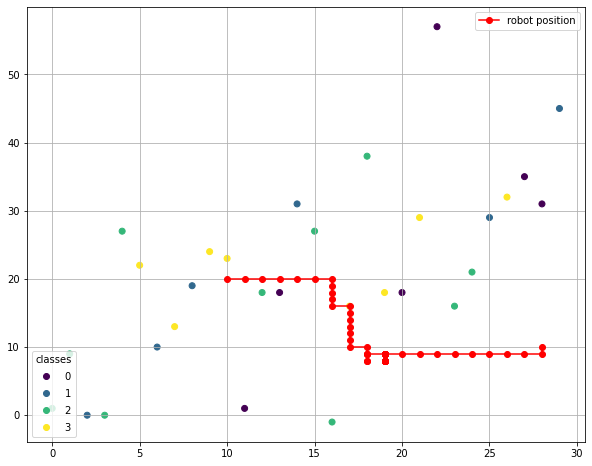

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

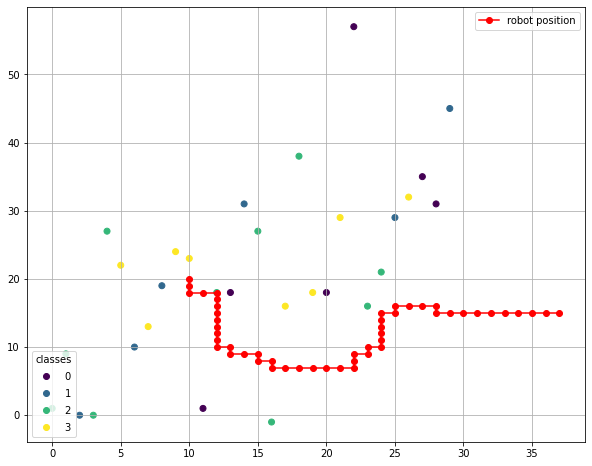

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 7, n_movements = 50)

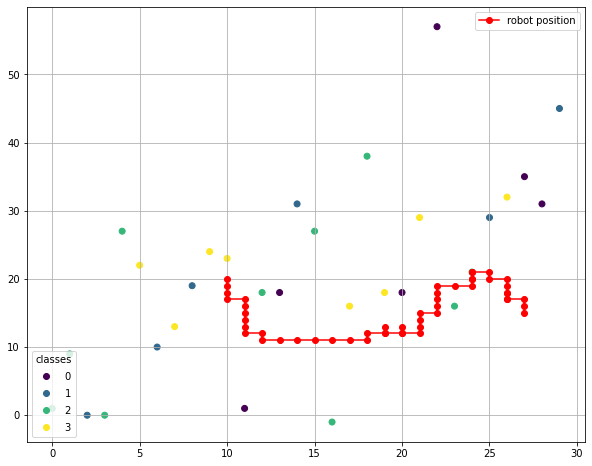

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 11, n_movements = 50)

In [ ]:
# если число соседей = 1, то робот почему-то покрывает очень малое расстояние (ходит почти на месте). Возможно, потому что в многих случаях он просто ходит от одной точки до другой,
# лишь иногда уходя право. Можно предположить, что при меньшем числе соседей путь работа будет более прямым, так как на большее число ходов будут оказывать влияние одни и те же точки,
# которые побуждают робота идти в определенном направлении.
# Не совсем понятно, что подразумевается под осмысленным выбором класса. Очевидно, что в случае ручного выбора мы могли бы направлять робота в нужные нам направления.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds (2).csv


In [ ]:
df = pd.read_csv('diamonds.csv')
df.head(8)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
if (X.isnull().any().any()):
  print("There are NaNs")
else:
  print("No NaNs")

No NaNs


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df = df.drop(columns = ["Unnamed: 0"])
df
# x, y, z может и непонятно что за признаки, но они могут на что-то влиять

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


In [ ]:
# C price больше всего коррелируют carat, x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data = pd.get_dummies(df, drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data.drop(columns = ["price"])
y = data["price"]

In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
object = StandardScaler() 
object.fit_transform(X_train)
object.fit_transform(X_test)

array([[ 0.64155556,  0.18524415, -1.10466869, ..., -0.54177964,
        -0.26887682, -0.32186034],
       [ 1.04373023,  0.60532415, -0.65798156, ..., -0.54177964,
        -0.26887682, -0.32186034],
       [ 0.85322644, -0.44487584,  0.23539269, ..., -0.54177964,
        -0.26887682, -0.32186034],
       ...,
       [ 1.50940615, -0.93496917,  0.68207981, ..., -0.54177964,
        -0.26887682, -0.32186034],
       [ 2.92760102,  0.60532415, -1.10466869, ..., -0.54177964,
        -0.26887682, -0.32186034],
       [ 2.65242888, -3.38543582,  0.23539269, ..., -0.54177964,
        -0.26887682, -0.32186034]])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print("Train error: ", mean_squared_error(y_pred_train, y_train))
print("Test error: ", mean_squared_error(y_pred_test, y_test))

Train error:  1284661.862119126
Test error:  1259159.1137946642


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
# Коэффициенты
dt = df.select_dtypes(include=['float64', 'int64'])
regs = LinearRegression()
regs.fit(X_train, y_train)
print("Сдвиг={}".format(regs.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=2249.4627251567254
Коэффициент для carat=11119.329638167881
Коэффициент для depth=-65.7183159783907
Коэффициент для table=-29.390766796755038
Коэффициент для x=-934.8846472822049
Коэффициент для y=-2.292008518057723
Коэффициент для z=-57.0472640260712
Коэффициент для cut_Good=541.6398685229275
Коэффициент для cut_Ideal=795.786816865188
Коэффициент для cut_Premium=721.7975349311293
Коэффициент для cut_Very Good=698.4331729582043
Коэффициент для color_E=-180.61797246399942
Коэффициент для color_F=-236.9246942522565
Коэффициент для color_G=-450.558533342666
Коэффициент для color_H=-943.6180436874397
Коэффициент для color_I=-1428.8083325411653
Коэффициент для color_J=-2343.3751505897544
Коэффициент для clarity_IF=5333.555068877371
Коэффициент для clarity_SI1=3670.3780923337094
Коэффициент для clarity_SI2=2701.8680983934387
Коэффициент для clarity_VS1=4592.448266754523
Коэффициент для clarity_VS2=4272.557380908764
Коэффициент для clarity_VVS1=5021.558582804125
Коэффициент для clarity_

In [ ]:
# Самые большие по модулю коэффициенты - carat, x.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(10).fit(X_train, y_train)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

print ("Train: {}".format(mean_squared_error(y_train, reg.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, reg.predict(X_test))))

Сдвиг=8183.330583078305
Коэффициент для carat=9474.314820971009
Коэффициент для depth=-105.92218642533588
Коэффициент для table=-55.51727692984375
Коэффициент для x=-396.2835565881943
Коэффициент для y=-0.0
Коэффициент для z=-0.0
Коэффициент для cut_Good=-0.0
Коэффициент для cut_Ideal=140.82560487697552
Коэффициент для cut_Premium=61.66680230827194
Коэффициент для cut_Very Good=78.08154325423281
Коэффициент для color_E=4.580046813626126
Коэффициент для color_F=0.0
Коэффициент для color_G=-108.99505919730679
Коэффициент для color_H=-584.6540161767177
Коэффициент для color_I=-969.124904455661
Коэффициент для color_J=-1760.0111603744442
Коэффициент для clarity_IF=1350.5932336250291
Коэффициент для clarity_SI1=37.82468753052365
Коэффициент для clarity_SI2=-758.0580386896079
Коэффициент для clarity_VS1=880.304914564129
Коэффициент для clarity_VS2=627.8114049946879
Коэффициент для clarity_VVS1=1227.3300874722745
Коэффициент для clarity_VVS2=1219.1653628129334

Train: 1529757.6242473677
Test:

In [ ]:
# У y и z веса занулились, то есть модель решила их выкинуть

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(10).fit(X_train, y_train)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

print ("Train: {}".format(mean_squared_error(y_train, reg.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, reg.predict(X_test))))

Сдвиг=2248.651534778986
Коэффициент для carat=10801.631993624433
Коэффициент для depth=-63.99991630621258
Коэффициент для table=-30.308164003933808
Коэффициент для x=-819.3643392602658
Коэффициент для y=1.8170394592350074
Коэффициент для z=-55.93264394658504
Коэффициент для cut_Good=567.2625971902011
Коэффициент для cut_Ideal=826.2378348320557
Коэффициент для cut_Premium=749.9036182014632
Коэффициент для cut_Very Good=731.3679165930478
Коэффициент для color_E=-168.57630224596812
Коэффициент для color_F=-224.99529591426725
Коэффициент для color_G=-433.1100653815586
Коэффициент для color_H=-923.5774671181648
Коэффициент для color_I=-1396.7467537740008
Коэффициент для color_J=-2298.3102071315584
Коэффициент для clarity_IF=4758.013120620115
Коэффициент для clarity_SI1=3130.619609483918
Коэффициент для clarity_SI2=2174.320402149337
Коэффициент для clarity_VS1=4046.1148233162958
Коэффициент для clarity_VS2=3731.98520586518
Коэффициент для clarity_VVS1=4467.6983491869605
Коэффициент для clari

In [ ]:
# У у сильно упал вес
# Тут ошибка как без регуляризации, а у Лассо ошибка была больше

In [ ]:
# Проблема мультиколлениарности была, но проявлялась не так сильно

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

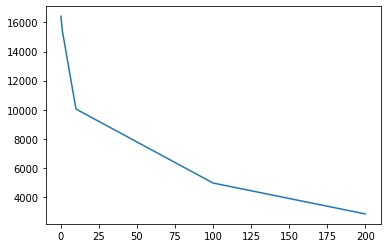

In [ ]:
points = [0.1, 1, 10, 100, 200]

reg = Lasso(0.1).fit(X_train, y_train)
res = np.array([])
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Lasso(1).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Lasso(10).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Lasso(100).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Lasso(200).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

plt.plot(points, res)

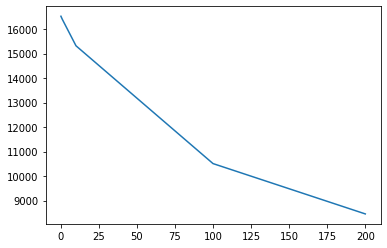

In [ ]:
points = [0.1, 1, 10, 100, 200]

reg = Ridge(0.1).fit(X_train, y_train)
res = np.array([])
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Ridge(1).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Ridge(10).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Ridge(100).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

reg = Ridge(200).fit(X_train, y_train)
array = np.array([])
for column, coef in zip(X.columns, reg.coef_):
    array = np.append(array, coef)
res = np.append(res, np.linalg.norm(array))

plt.plot(points, res)

In [ ]:
# Lasso сильнее уменьшает веса (видно хотя бы по последним значениям). Лассо чаще используют для отбора признаков, так как оно просто зануляет все не очень нужные.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lambdas = np.arange(0.01, 1, 0.05)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y_train)))
    print(((val, mean_squared_error(y_pred, y_train))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.average(cross_val_score(best_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))

Все лямбды:
[0.01 0.06 0.11 0.16 0.21 0.26 0.31 0.36 0.41 0.46 0.51 0.56 0.61 0.66
 0.71 0.76 0.81 0.86 0.91 0.96]
(0.01, 1284662.3311348967)
(0.060000000000000005, 1284678.7291089643)
(0.11, 1284718.5178503161)
(0.16000000000000003, 1284781.664810976)
(0.21000000000000002, 1284868.0108373377)
(0.26, 1284977.6984957778)
(0.31000000000000005, 1285110.6740186205)
(0.36000000000000004, 1285266.8201734)
(0.41000000000000003, 1285445.9615328847)
(0.46, 1285648.3907881535)
(0.51, 1285874.1078105737)
(0.56, 1286122.3967853943)
(0.6100000000000001, 1286393.9028103815)
(0.66, 1286688.6546929993)
(0.7100000000000001, 1287005.411829448)
(0.76, 1287346.5803206447)
(0.81, 1287709.5042260794)
(0.8600000000000001, 1288095.4601610694)
(0.91, 1288506.3111814116)
(0.9600000000000001, 1288938.4980683024)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+10, tolerance: 4.831e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive



Оптимальная lambda:
Lambda=0.01, результат=1295464.84


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
reg = Lasso(0.01).fit(X_train, y_train)
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

print ("Train: {}".format(mean_squared_error(y_train, reg.predict(X_train))))

Сдвиг=2258.964332194617
Коэффициент для carat=11117.628610352418
Коэффициент для depth=-65.78459455239994
Коэффициент для table=-29.423919820210457
Коэффициент для x=-934.451894591584
Коэффициент для y=-2.238874051970836
Коэффициент для z=-56.88406743221257
Коэффициент для cut_Good=540.601040403907
Коэффициент для cut_Ideal=794.7623990465711
Коэффициент для cut_Premium=720.7781980121309
Коэффициент для cut_Very Good=697.4592291046234
Коэффициент для color_E=-180.08378493799998
Коэффициент для color_F=-236.39255693941408
Коэффициент для color_G=-449.9802246034626
Коэффициент для color_H=-943.0254936312333
Коэффициент для color_I=-1428.1060638193924
Коэффициент для color_J=-2342.549536806936
Коэффициент для clarity_IF=5328.095809444348
Коэффициент для clarity_SI1=3665.31690356606
Коэффициент для clarity_SI2=2696.8591711186223
Коэффициент для clarity_VS1=4587.278779807011
Коэффициент для clarity_VS2=4267.469325656373
Коэффициент для clarity_VVS1=5016.294471735615
Коэффициент для clarity_V

In [ ]:
# Коэффициент y очень малоинформативен.
# Коэффициент carat очень информативен, второе место по важности - с отрывом у х.
# Остальные одинаково информативны

# Carat очень важен - это очевидно, так как цена сильно зависит от веса камня в положительную сторону
# Параметр y, судя по всему, просто очень сильно зависел от x. Поэтому без регуляризации модель просто считала бы, по сути, два одинаковых параметра (грубо говоря одно и то же, названное разными словами).
# Параметр X сильно влияет на цену в отрицательную сторону.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
reg = Lasso(0.01).fit(X_train, y_train)
print ("Lasso: {}".format(mean_squared_error(y_test, reg.predict(X_test))))

print()

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print("Test error: ", mean_squared_error(y_pred_test, y_test))

Lasso: 1259192.7367469387

Test error:  1259159.1137946642


In [ ]:
# Результаты почти одинаковые. Это связано с тем, что мы взяли очень маленький параметр регуляризации (а что делать, если с остальными еще хуже было).
# Видимо, наша модель и так прпосто выкидывала и не особо считала ненужный параметр y, а остальные признаки не так и сильно зависели друг от друга, чтобы дать серьезнуб разницу в результатах.
# В любом случае, после оценки и выбора правильного параметра регуляризации модель с ней будет работать как минимум не хуже (а часто лучше).